In [4]:
import netCDF4 as nc
import numpy as np
from datetime import datetime
import os
in_var = 'u10'
fn = 'download/era5/'+in_var+'-2010_2020.nc'
dl = nc.Dataset(fn)
print(dl)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    Conventions: CF-1.6
    history: 2024-04-11 13:12:37 GMT by grib_to_netcdf-2.25.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf.bin -S param -o /cache/data9/adaptor.mars.internal-1712840648.4166346-6564-1-016c12f7-8942-4793-8421-d251d5b069ea.nc /cache/tmp/016c12f7-8942-4793-8421-d251d5b069ea-adaptor.mars.internal-1712838583.1415808-6564-1-tmp.grib
    dimensions(sizes): longitude(21), latitude(13), time(32144)
    variables(dimensions): float32 longitude(longitude), float32 latitude(latitude), int32 time(time), int16 u10(time, latitude, longitude)
    groups: 


In [5]:
# Create some sample arrays for demonstration
arr1 = np.random.rand(10, 100, 100)  # Example array 1
arr2 = np.random.rand(10, 100, 100)  # Example array 2

# Concatenate along a new dimension (var)
# Create a new axis for each array to represent the var dimension
arr1_with_var = np.expand_dims(arr1, axis=3)  # Shape: (10, 100, 100, 1)
arr2_with_var = np.expand_dims(arr2, axis=3)  # Shape: (10, 100, 100, 1)

# Concatenate along the var dimension (axis=3)
concatenated_array = np.concatenate((arr1_with_var, arr2_with_var), axis=3)

# Resulting shape will be (time, x, y, var)
print(concatenated_array.shape)
print(arr1_with_var[0, 0, 0, 0])

(10, 100, 100, 2)


In [9]:
np.array(dl['time'][:])[-1]

1060677

In [10]:
print(1060677 - 964248)
print(32144*3)
datetime(2010, 1, 2, 0).timestamp()/3600/3 - datetime(2010, 1, 1, 0).timestamp()/3600/3

96429
96432


8.0

In [11]:
for dim in dl.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'longitude', size = 21
<class 'netCDF4._netCDF4.Dimension'>: name = 'latitude', size = 13
<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 32144


In [12]:
from datetime import datetime

datetime.fromtimestamp(float(dl["time"][3]))
start_year, end_year = 2019, 2019
first_day = datetime(start_year, 1, 1, 0, 0)
last_day = datetime(end_year, 12, 31, 23, 59)

first_timestamp = datetime.timestamp(first_day)
last_timestamp = datetime.timestamp(last_day)
print(first_timestamp, last_timestamp)


1546297200.0 1577833140.0


In [13]:
import matplotlib.pyplot as plt
import numpy as np
# Find the minimum and maximum values in the dataset
min_val = np.min(dl["tp"])
max_val = np.max(dl["tp"])

# Plot each random sample
for i in range(10):
    rand_num = np.random.randint(0, 8730)
    plt.figure()
    plt.imshow(dl["tp"][rand_num])
    
    # Set the color scale limits based on the min and max values
    plt.colorbar(ticks=np.linspace(min_val, max_val, num=20))
    plt.clim(min_val, max_val)
    
    plt.show()

IndexError: tp not found in /

In [ ]:
fn = 'cerra.nc'
ds = nc.Dataset(fn)
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    GRIB_edition: 2
    GRIB_centre: eswi
    GRIB_centreDescription: Norrkoping
    GRIB_subCentre: 255
    Conventions: CF-1.7
    institution: Norrkoping
    history: 2024-04-10T08:32 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-2.27.0 with {"source": "/cache/tmp/1906ee89-b624-449f-a527-b0621c9bfb67-adaptor.mars.external-1712737774.8854349-29839-27-tmp.grib", "filter_by_keys": {}, "encode_cf": ["parameter", "time", "geography", "vertical"]}
    dimensions(sizes): time(2920), y(1069), x(1069)
    variables(dimensions): int64 time(time), float64 step(), float64 surface(), float64 latitude(y, x), float64 longitude(y, x), float64 valid_time(time), float32 tp(time, y, x)
    groups: 


In [ ]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'time', size = 2920
<class 'netCDF4._netCDF4.Dimension'>: name = 'y', size = 1069
<class 'netCDF4._netCDF4.Dimension'>: name = 'x', size = 1069


In [ ]:
lat = ds['latitude'][:]
lat = np.array(lat)[:]
print(lat)
y_index = np.argwhere((lat>49) & (lat<52)).flatten()
y_index.size

[[20.292281   20.30694167 20.3215796  ... 20.32157984 20.30694191
  20.29228124]
 [20.33366508 20.34833914 20.36299043 ... 20.36299067 20.34833938
  20.33366532]
 [20.37505942 20.38974688 20.40441156 ... 20.4044118  20.38974712
  20.37505966]
 ...
 [63.70871082 63.74564392 63.78254191 ... 63.78254251 63.74564452
  63.70871143]
 [63.73913522 63.7760965  63.8130227  ... 63.81302331 63.77609711
  63.73913583]
 [63.76951353 63.80650299 63.8434574  ... 63.84345801 63.8065036
  63.76951414]]


137562

In [ ]:
long = ds['longitude'][:]
print(long)
long = np.array(long)[0, :]
x_index = np.argwhere((long>2.5) & (long<6.5)).flatten()
x_index

[[342.514057   342.55818325 342.60232794 ...  33.39767134  33.44181602
   33.48594228]
 [342.49840486 342.54255389 342.58672138 ...  33.41327789  33.45744539
   33.50159442]
 [342.48273423 342.52690606 342.57109638 ...  33.4289029   33.47309322
   33.51726504]
 ...
 [302.06206865 302.13088553 302.19985614 ...  73.80014273  73.86911335
   73.93793022]
 [301.97856972 302.04735663 302.1162975  ...  73.88370137  73.95264224
   74.02142915]
 [301.89491724 301.96367379 302.03258451 ...  73.96741436  74.03632508
   74.10508164]]


array([424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436,
       437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449,
       450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462,
       463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475,
       476, 477, 478, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488,
       489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501,
       502, 503])

In [ ]:
import numpy as np
Data = np.array(ds["tp"][:, y_index, x_index])


NameError: name 'ds' is not defined

In [ ]:
data = np.load('download/cerra/si10-2019.npy')
data

array([], shape=(1, 0, 1), dtype=float32)

In [19]:

variable = '10m_wind_speed'
var_name = ''
if variable == 'total_precipitation':
    var_name = 'tp'
elif variable == '10m_wind_speed':
    var_name = 'si10'
else:
    print("Variable not supported!")
    print("Supported variables: total_precipitation, 10m_wind_speed")

file_path = 'download/cerra/si10-2019.nc'

year = file_path.split('/')[-1].split('-')[1].split('.')[0]

data = nc.Dataset(file_path)

lat = data['latitude'][:, 0]
y_index = np.where((lat <= 52) & (lat >= 49))[0]

lon = data['longitude'][0, :]
x_index = np.where((lon >= 2) & (lon <= 7))[0]

filter_lat = np.array(lat[y_index])
filter_lon = np.array(lon[x_index])
filter_data = np.array(data[var_name][:, y_index, x_index])
datetime = np.array(data["valid_time"][:])

if not os.path.exists('download/cerra/lat.npy'):
    np.save('download/cerra/lat.npy', filter_lat)
if not os.path.exists('download/cerra/lon.npy'):
    np.save('download/cerra/lon.npy', filter_lon)
if not os.path.exists('download/cerra/datetime_' + year + '.npy'):
    np.save('download/cerra/datetime_' + year + '.npy', datetime)
file_name = file_path.split('/')[-1].split('.')[0]
np.save('download/cerra/' + file_name + '.npy', filter_data)

In [21]:
filter_data.shape

(2920, 73, 101)

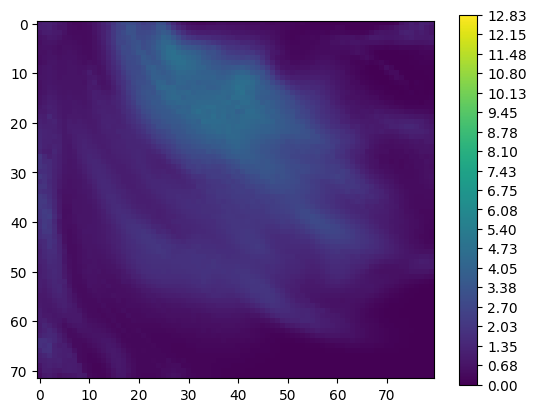

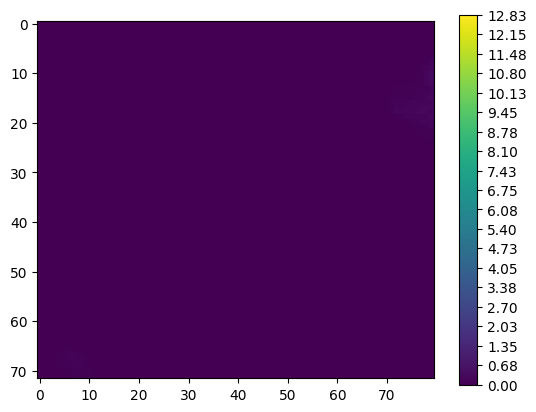

In [ ]:
min_val = np.min(Data)
max_val = np.max(Data)

# Plot each random sample
for i in range(2):
    rand_num = np.random.randint(0, 2920)
    plt.figure()
    plt.imshow(Data[rand_num])
    
    # Set the color scale limits based on the min and max values
    plt.colorbar(ticks=np.linspace(min_val, max_val, num=20))
    plt.clim(min_val, max_val)
    
    plt.show()